In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [55]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [56]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [57]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),          # Input layer (28x28 -> 784)

    layers.Dense(256, activation='relu'),          # 1st hidden layer
    layers.Dropout(0.3),                           # Regularization

    layers.Dense(128, activation='relu'),          # 2nd hidden layer
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),           # 3rd hidden layer
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')         # Output layer (10 classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [59]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)



Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6872 - loss: 0.8666 - val_accuracy: 0.8412 - val_loss: 0.4422
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8270 - loss: 0.4844 - val_accuracy: 0.8588 - val_loss: 0.3703
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8425 - loss: 0.4310 - val_accuracy: 0.8658 - val_loss: 0.3685
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8515 - loss: 0.4160 - val_accuracy: 0.8668 - val_loss: 0.3638
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8567 - loss: 0.3997 - val_accuracy: 0.8687 - val_loss: 0.3612
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8609 - loss: 0.3848 - val_accuracy: 0.8705 - val_loss: 0.3562
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8669 - loss: 0.3640 - val_accuracy: 0.8732 - val_loss: 0.3615
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8726 - loss: 0

In [60]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - 4ms/step - accuracy: 0.8753 - loss: 0.3473

Test accuracy: 0.8752999901771545


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


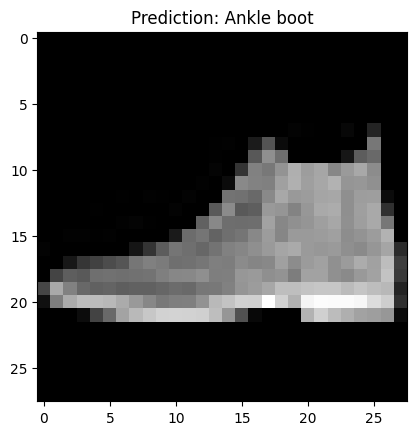

In [61]:
predictions = model.predict(x_test)

# Example: show first test image and predicted label
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Prediction: {class_names[predictions[0].argmax()]}")
plt.show()


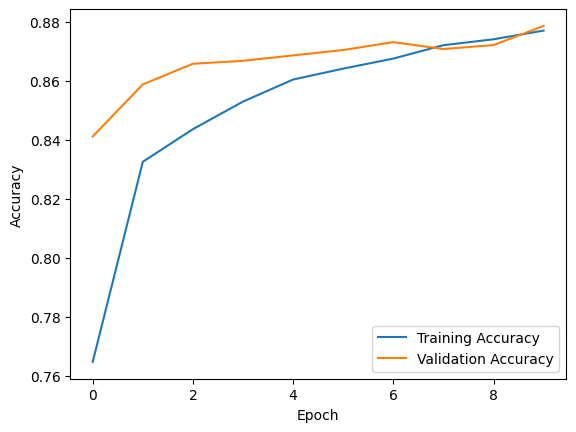

In [62]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
